> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue


### Question(s) for Analysis
**Question 1**: Which day of the week should a movie be released with respect to popularity and average voting?

**Question 2**: Which genres are most popular from year to year?

**Question 3**: How is the trend of revenue from year to year?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [3]:
#  pd.read_csv to load data and print first 5 observations with df.head() 
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Access information about the dataset with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

release_date is string will be change to appropriate dtype, daytime in subsequence work to extract the day of the week to answer our question and release_year will be converted to string from integer to help answer question two.

In [5]:
# .isna to check of null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

null values need to be dropped for my analysis to avoid unneccessary error

In [6]:
#  DataFrame.duplicated to check of duplicate
df.duplicated().sum()

1

duplicate need to be dropped from the dataset

In [7]:
# Number of unique variables for each feature
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

I will focus on features with small number of unique observationS: "vote_average", 'release_year',"runtime", "budget". This will help to see the trend in the data with other features.
    

In [8]:
# Acess value counts for 'release_year',"vote_average", "budget", "runtime"
col = ['release_year',"vote_average", "budget", "runtime",]
for c in df[col]:
    print(df[c].value_counts())


2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64
6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
      ... 
8.6      1
8.9      1
9.2      1
2.0      1
8.7      1
Name: vote_average, Length: 72, dtype: int64
0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
40000          1
28        

I will narrow my focus to 20 largest value counts for 'release_year',"vote_average", "budget", "runtime"

In [9]:
# Acess the column
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
col1 = ['genres', 'cast']
for c in df[col1]:
    print(df[c].value_counts())

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64
Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
Aziz Ansari                                                                       3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                  3
           


### Data Cleaning

 

In [11]:
# to_datetime  to change release_date from object to datetime dtpye
df["release_date"] = pd.to_datetime(df["release_date"])
# comfirming the change
df["release_date"].dtype

dtype('<M8[ns]')

In [12]:
df["release_year"] = df["release_year"].apply(str)

In [13]:
# Remove duplicate with drop_duplicates
df = df.drop_duplicates()
# comfirm the change
df.duplicated().sum()

0

In [14]:
# Remove null values with dropna()
df = df.dropna()

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 Which day of the week should a movie be released with respect to revenue, popularity, and average voting?

In [15]:
# Statistical Summary
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,4.250000e+08,2.827124e+09


From the statistical summary the following features budget,revenue budget_adj, revenue_adj and runtime contain zeros( which might be missing value). They will be replace with nan in subsequence work.

In [16]:
# create a copy 
df1 = df.copy()
# colummns with zero values
zero_cols = ["budget","revenue","runtime","budget_adj", "revenue_adj"] # replace with nan
# .apply() with lambda set axis = 1 to column
df1[zero_cols] = df1[zero_cols].apply(lambda x: x.replace(0, np.nan,),axis =1)
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.446000e+03,1.446000e+03,1990.000000,1992.000000,1992.000000,1.446000e+03,1.446000e+03
mean,71652.152108,1.316763,4.759480e+07,1.587198e+08,106.146734,643.616968,6.178614,4.997049e+07,1.794165e+08
std,92355.883915,1.873563,5.393600e+07,2.448540e+08,29.055166,1092.355998,0.881955,5.422983e+07,2.859650e+08
min,11.000000,0.000620,1.000000e+00,1.000000e+01,5.000000,10.000000,2.100000,9.693980e-01,1.000000e+01
25%,9699.000000,0.384079,1.000000e+07,1.444875e+07,92.000000,51.000000,5.600000,1.107498e+07,1.665450e+07
50%,35112.500000,0.774223,3.000000e+07,6.665356e+07,102.000000,210.000000,6.200000,3.049201e+07,7.098536e+07
75%,83573.000000,1.538639,6.500000e+07,1.893947e+08,116.000000,688.250000,6.800000,7.089506e+07,2.123399e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,4.250000e+08,2.827124e+09


In [17]:
# .dropna() from df1
df1 = df1.dropna()

<Figure size 1080x1080 with 0 Axes>

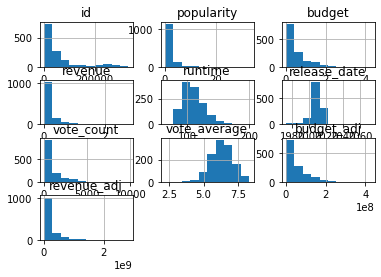

In [18]:
# .hist() to plot of histogram for distribution
plt.figure(figsize = (15,15))
df1.hist()
plt.show();

from the histogram above, the following are right-skewed: budget,budget_adj,revenue_adj,revenue, vote_count,popularity and runtime while release_year is left-skewed and vote_average has normal distribution

In [19]:
# .corr() for correlation of numerical features
df1.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.189301,-0.050921,-0.031441,-0.013123,0.059368,0.004985,-0.116021,-0.102211
popularity,0.189301,1.000000,0.432791,0.594755,0.322390,0.744088,0.355904,0.419863,0.549299
budget,-0.050921,0.432791,1.000000,0.706888,0.337373,0.583038,0.075168,0.985112,0.566835
revenue,-0.031441,0.594755,0.706888,1.000000,0.371226,0.775374,0.296501,0.713706,0.913802
runtime,-0.013123,0.322390,0.337373,0.371226,1.000000,0.426505,0.385210,0.361985,0.371980
vote_count,0.059368,0.744088,0.583038,0.775374,0.426505,1.000000,0.464812,0.572798,0.703183
vote_average,0.004985,0.355904,0.075168,0.296501,0.385210,0.464812,1.000000,0.088272,0.322503
budget_adj,-0.116021,0.419863,0.985112,0.713706,0.361985,0.572798,0.088272,1.000000,0.613093
revenue_adj,-0.102211,0.549299,0.566835,0.913802,0.371980,0.703183,0.322503,0.613093,1.000000


<AxesSubplot:>

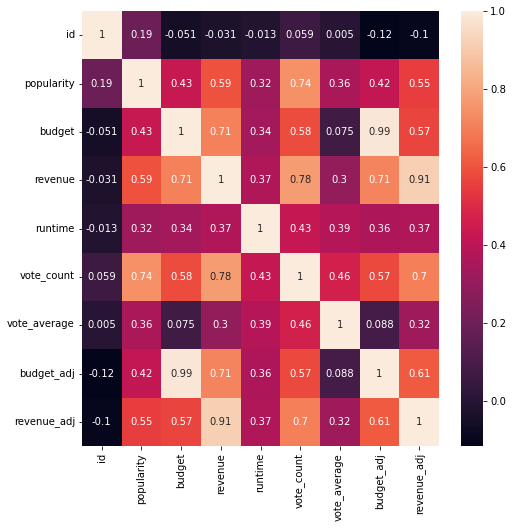

In [20]:
# Visual for Correlation of numerical features
plt.figure(figsize = (8,8))
sns.heatmap(df1.corr(), annot =True)

There is strong positive correlation strength between: budget and revenue, revenue and vote_count, vote_count and popularity

In [21]:
# split genres string, at |, explode the list to rows
genres_df = df1.assign(genres=df1['genres'].str.split('|')).explode('genres')
genres_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


#### Extract day of the week from release_date feature


In [22]:
# dt.day_name() for  new column with release_day
genres_df["release_day"] = genres_df["release_date"].dt.day_name()
# confirm new column
genres_df["release_day"].value_counts()

Friday       1071
Thursday      838
Wednesday     704
Tuesday       380
Monday        178
Saturday      149
Sunday        134
Name: release_day, dtype: int64

In [23]:
# def to create function for plotting
def myplot(df, grpvar, yvar, stat ="mean", figsize = (14, 6), order = None):
    # plot 
    df.groupby([grpvar])[yvar].agg(stat).reindex(index = order).plot.bar(edgecolor ="black",figsize=figsize,rot =0,width = 0.8);
    # Optional: after plotting tidy up labels
    grpvar = grpvar.replace("_"," ") # replace _ with space
    yvar = yvar.replace("_"," ") # replace _ with space
    
    plt.title(f'{stat} of {yvar} by {grpvar}'.title(), fontsize =14, weight = "bold")
    # Add x label and format it
    plt.xlabel(grpvar.title, fontsize = 10, weight = "bold")
    
    # Add y label and format it
    plt.ylabel(f'{stat} {yvar}'.title(), fontsize = 10, weight = "bold")
    

In [24]:
# days in order
days_in_order = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

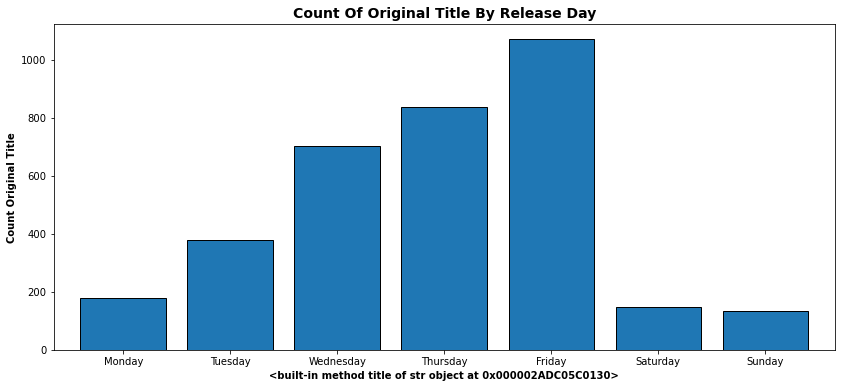

In [25]:
# Visual for Release day
myplot(genres_df,"release_day", "original_title", stat = "count", order = days_in_order)


From the diagram above more movies are released on Fridays than any other days. Further investigate will be done to see how this day affect mean revenge, vote_average and popularity


In [26]:
# Groupby release day and compute mean by vote_average
df_day_vote = genres_df.groupby(["release_day"]).mean()["vote_average"].sort_values()
df_day_vote 

release_day
Saturday     6.136913
Friday       6.175817
Thursday     6.220644
Monday       6.337079
Tuesday      6.369737
Sunday       6.394030
Wednesday    6.433665
Name: vote_average, dtype: float64

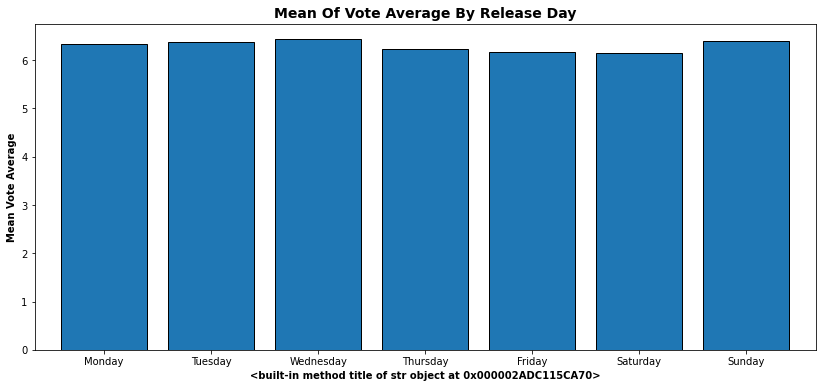

In [27]:
# plot of Groupby release day and compute mean by vote_average
myplot(genres_df,"release_day", "vote_average", stat = "mean", order = days_in_order)

Movies release on Wednesdays  get the most vote_average follow by Sundays and then Mondays though alot of movies are released on Fridays  and Thurdays. Initially I was expecting to see the reflection of Fridays  and Thurdays with regard to mean vote_average

In [28]:
# Groupby release day and compute mean by "popularity"
genres_df.groupby(["release_day"]).mean()["popularity"].sort_values()

release_day
Friday       1.422371
Saturday     1.499761
Sunday       1.700899
Thursday     1.782691
Monday       1.811913
Tuesday      2.507182
Wednesday    2.798378
Name: popularity, dtype: float64

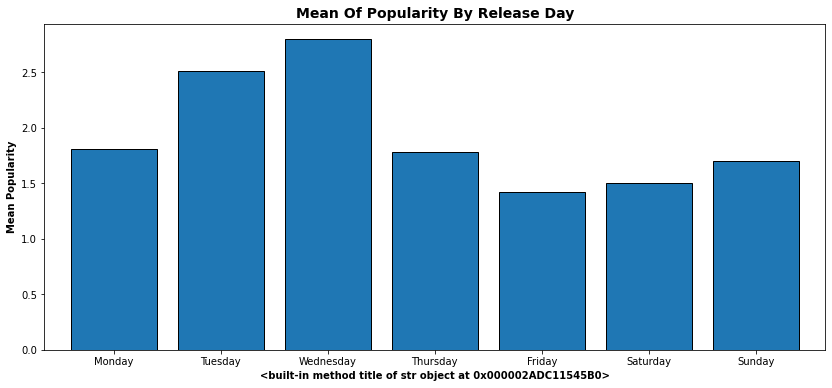

In [29]:
# Visual for Groupby release day and compute mean by "popularity"
myplot(genres_df,"release_day", "popularity", stat = "mean", order = days_in_order)

From the diagram movies release on Wednesdays get the most popularity rate as compared to other days of the week though alot of movies are released on Fridays and Thurdays. Will further investigate to see how popularity will reflect in the release day with regard to average revenue

In [32]:
# Groupby release day and compute mean by "revenue"
genres_df.groupby(["release_day"]).mean()["revenue_adj"].sort_values()

release_day
Friday       1.254795e+08
Thursday     2.028699e+08
Saturday     2.143954e+08
Monday       2.640237e+08
Sunday       2.766273e+08
Tuesday      3.235475e+08
Wednesday    3.269587e+08
Name: revenue_adj, dtype: float64

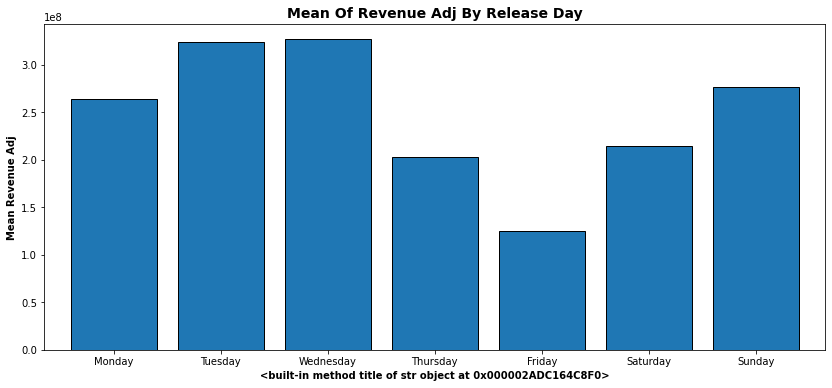

In [33]:
# Visual for Groupby release day and compute mean by revenue
myplot(genres_df,"release_day", "revenue_adj", stat = "mean", order = days_in_order)

From the diagram movies release on Wednesdays generate the highest average revenue as compared to any other days of the week. It can be inferred that movies with  most popularity rate generate the high average revenue.
Will further investigate to see the genre that contribute to popularity and revenue on Wednesdays.

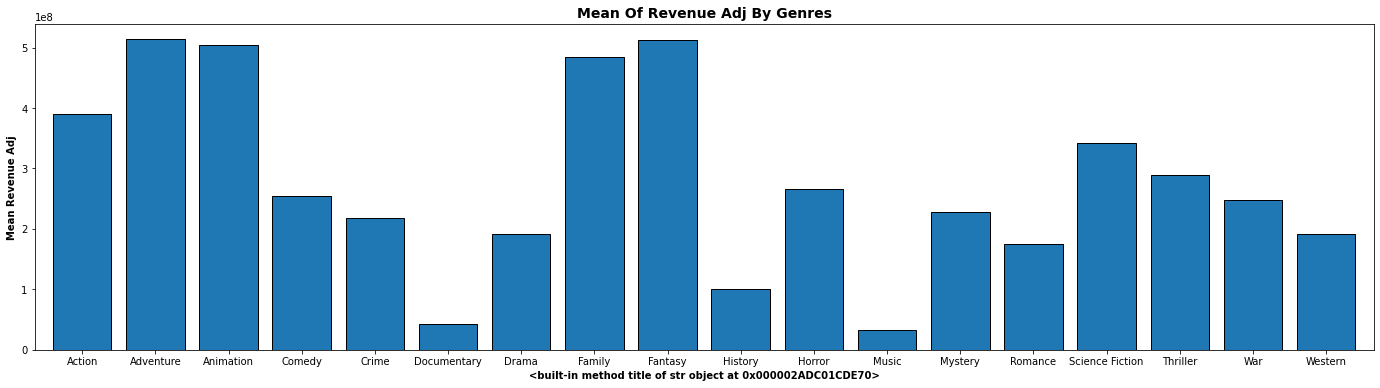

In [38]:
# visual for Filter release day by Wednesday groupby genre and compute the mean revenue and print the first 20
df2 =genres_df[genres_df["release_day"]=="Wednesday"]
myplot(df2,"genres", "revenue_adj", figsize = (24,6))

Wow! These genres contribute to popularity and high average revenue on Wednesdays

### Question 2: Which genres are most popular from year to year??

In [39]:
# group by genres release_year then compute mean by "popularity"
genres_df.groupby(["genres"]).mean()["popularity"].sort_values(ascending= False)

genres
Science Fiction    3.067299
Adventure          3.017460
Fantasy            2.600988
Western            2.510376
Action             2.482394
Animation          2.068166
Family             2.012103
Thriller           1.953044
Mystery            1.827205
War                1.813071
Crime              1.563969
Drama              1.414404
Comedy             1.385712
Music              1.309767
Romance            1.280101
History            1.273964
Horror             1.168778
Documentary        0.363880
Foreign            0.216503
Name: popularity, dtype: float64

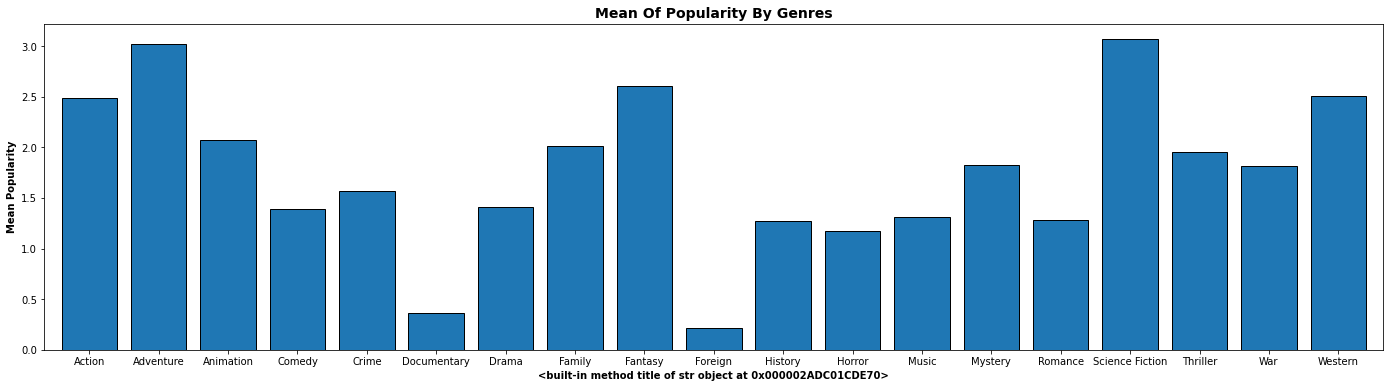

In [40]:
# visual for group by genres release_year then compute mean by "popularity"
myplot(genres_df,"genres", "popularity", figsize = (24,6))

From the diagram the genres : Science Fiction, Adventure, Fantasy and Western others have been popular from year to year

### Question 3: How is the trend of revenue  from year to year?

In [41]:
df_year = genres_df.groupby(["release_year"]).sum()["revenue_adj"]
df_year

release_year
1961    5.835889e+07
1962    1.288871e+09
1963    1.685320e+09
1964    2.648309e+09
1965    2.931461e+09
1967    2.188210e+09
1969    1.461834e+09
1971    3.289326e+09
1972    2.555827e+09
1973    8.885525e+09
1974    1.294473e+09
1975    7.611825e+09
1977    1.037064e+10
1978    9.392989e+08
1979    4.362153e+09
1980    4.330446e+09
1981    4.219221e+09
1982    7.513491e+09
1983    6.394559e+09
1984    5.291470e+09
1985    4.017281e+09
1986    8.753388e+07
1987    2.506016e+09
1988    1.496633e+08
1989    5.625761e+09
1990    4.544531e+09
1991    3.044674e+09
1992    6.269823e+09
1993    5.587393e+09
1994    4.649711e+09
1995    5.312161e+09
1996    8.128106e+09
1997    1.353000e+10
1998    3.762954e+09
1999    1.701201e+10
2000    6.876780e+09
2001    1.641119e+10
2002    2.004603e+10
2003    1.642192e+10
2004    2.926645e+10
2005    1.974833e+10
2006    2.789890e+10
2007    4.999024e+10
2008    3.299060e+10
2009    6.140341e+10
2010    5.717892e+10
2011    6.076653e+10


In [42]:
# .arange from 1961 to 2015
np.arange(1961, 2016,1, dtype=int)  # range from 1961 to 2015

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [45]:
num =[1961, 1962, 1963, 1964, 1965, 1967, 1969, 1971,
       1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] # year from the dataset that not include 1966, 1970,1976

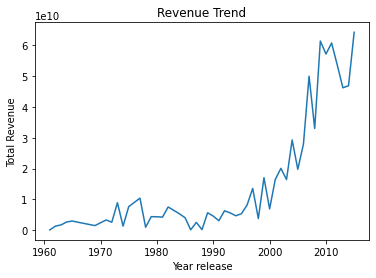

In [46]:
# plot total revenue vs year release
plt.plot(num,df_year)
plt.xlabel("Year release")
plt.ylabel("Total Revenue")
plt.title("Revenue Trend")
plt.show();

<a id='conclusions'></a>
## Conclusions
###### Wednesdays have the most average popularity and revenue
###### The total revenue has increased exponentially from 1961 to 2015
###### Science Fiction has been most popular genre

## Limitation
#### Focus on small number of colummns for my dependable variables


## Submitting your Project 



In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

### Reference
<a href="https://pandas.pydata.org/">Pandas</a>
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot/">Matplotlib</a>
<a href="https://numpy.org/">Numpy</a>
<a href="https://review.udacity.com/#!/reviews/3631464">From Review</a>